In [72]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver import ActionChains
driver = webdriver.Chrome('./chromedriver_90')
## https://www.amazon.com/
url = 'https://coronaboard.kr/'
driver.get(url)
import time
time.sleep(3)  # 홈페이지 로딩 시간 3초

In [73]:
some_tag = driver.find_element_by_xpath('//*[@id="korea-slide"]/div/div[4]/div/button')
ActionChains(driver).move_to_element(some_tag).perform()
some_tag.click()
#인구수 추가 
sel_menu = driver.find_element_by_xpath('//*[@id="bs-select-2-4"]')
sel_menu.click()
# 치명률  추가
sel_menu = driver.find_element_by_xpath('//*[@id="bs-select-2-1"]')
sel_menu.click()
some_tag.click() #콤보박스 닫기

In [42]:
all_data = []
for i in range(2, 10):
    tmp = '//*[@id="kr-table"]/div/div/table/tbody/tr/td[{}]'.format(i)
    # print(tmp)
    sel_ele = driver.find_elements_by_xpath(tmp)
    del sel_ele[7]

    column_data = []
    for one in sel_ele:
        # print(one.text)
        column_data.append(one.text)
    print( len(sel_ele) )
    all_data.append(column_data)
#     print(column_data)
#     print()
# all_data

17
17
17
17
17
17
17
17


### 도시별 추적 불가 확진자 인원 산정 & (현재확진자+추적 불가인원) 이용한 도시별 실질 확진자수 & 적정 백신 분배량
일평균 백신 사용량 참고= 코로나바이러스감염증-19_예방접종_일일현황_20210623(0시 기준).xlsx

In [74]:
# //*[@id="country-table"]/div/div/table/tbody/tr[65]/td[2]
# //*[@id="kr-table"]/div/div/table/tbody/tr[1]/td[2]
# //*[@id="kr-table"]/div/div/table/tbody/tr[2]/td[3]
re=[]
for i in all_data[2]:

        try:
            op=i.split('\n')
            go=op[0].split(",")
            nu=int(go[0]+go[1])
            re.append(nu)
            
        except:
            op=i.split('\n')
            nu=int(op[0])
            re.append(nu)
bef=[]
for i in all_data[1]:

        try:
            op=i.split('\n')
            go=op[0].split(",")
            nu=int(go[0]+go[1])
            bef.append(nu)
            
        except:
            op=i.split('\n')
            nu=int(op[0])
            bef.append(nu)
per =[]
for i in all_data[7]:

        try:
            go=i.split(",")
            nu=int(go[0]+go[1]+go[2])
            per.append(nu)
            
        except:
            go=i.split(",")
            nu=int(go[0]+go[1])
            per.append(nu)
deat=[]
for i in all_data[5]:
        re_num=float(i)
        deat.append(re_num)
da4=[]
for i in per:
    da4.append((i/100)*0.05)

da3=[]
for i in per:
    da3.append((i/100)*0.033)
da2=[]
for i in per:
    da2.append((i/100)*0.02)
da1=[]
for i in per:
    da1.append((i/100)*0.0167)
perc=[]
tonum=0
for n in range(17):
        tonum += re[n]
        tonum += h_d[n]
for i in re:
    perc.append(i/(tonum/100))
h_d=[]
for x in range(len(da3)):
    h_d.append((da3[x]/100)*deat[x])
print(h_d) 
vac=1228673
o_per=vac/100
vac_g=[]
for v in perc:
    vac_g.append(o_per*v)
import pandas as pd
dict_dat = { "지역":all_data[0],
    "확진자" :bef ,
    "치료중":re,
    "사망자":all_data[4],
    "치명률(%)":deat,
    "발생률(%)":all_data[6],
    "인구수":per , 
    "미발견":da3,
    "미발견 사망":h_d,
    "현감염퍼센트":perc,
    "적정 백신량":vac_g
}
dat = pd.DataFrame(dict_dat)
dat
dat.to_excel("corona_dat1.xlsx", index=False)
# # # os.listdir( os.getcwd() )

[35.332637670000004, 65.58932159999999, 16.884861840000003, 8.77967343, 22.518005400000003, 4.4369740800000015, 15.815297520000003, 7.7045116500000015, 7.625673000000001, 11.611578660000001, 3.84565632, 5.6778331500000006, 5.351171760000001, 14.992741500000001, 5.53819464, 0.22134717, 0.22593648000000002]


In [75]:
dict_dat = { "지역":all_data[0],
    "인구수":per , 
    "악화(0.05%)":da4,
    '평균(0.033%)':da3,
    '완화(0.02%)':da2,
    '최적(0.0167%)':da1
}
dat = pd.DataFrame(dict_dat)
dat
dat.to_excel("corona_dat2.xlsx", index=False)
# # os.listdir( os.getcwd() )

## 도시별 추적불가 확진자 인원(산정기준 1)0.05%, 2)0.033%, 3)0.02%, 4)0.167%)
    *기준 참조: https://m.hani.co.kr/arti/science/science_general/990146.html

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np
import platform
from matplotlib import font_manager, rc
import matplotlib
import warnings
warnings.filterwarnings('ignore')
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

[]

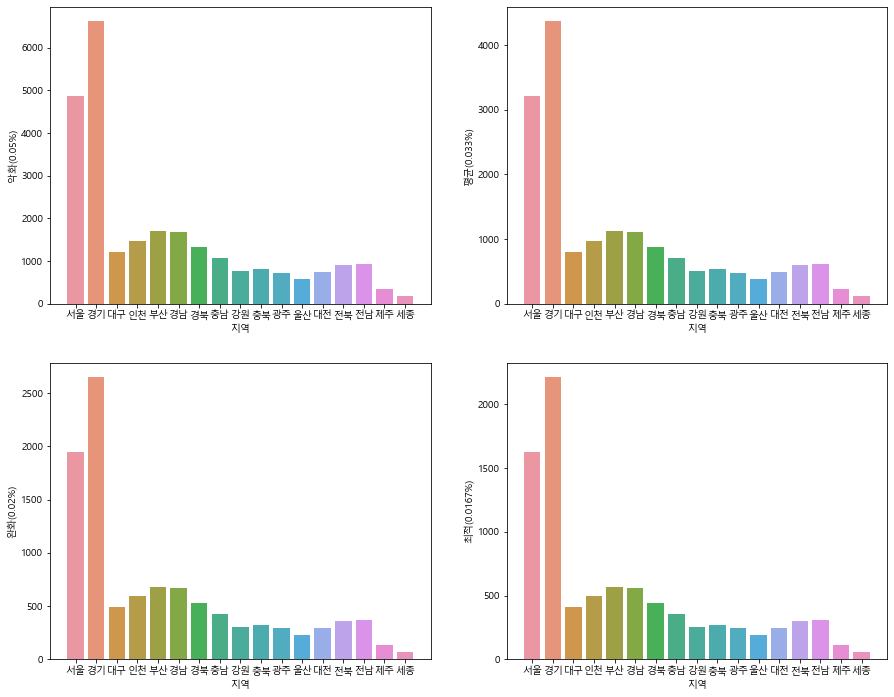

In [80]:
train = pd.read_excel('./corona_dat2.xlsx')

fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('xkcd:white')
axis1 = fig.add_subplot(2, 2, 1)
axis1 = sns.barplot(x='지역', y='악화(0.05%)', data=train)
axis1.plot()
axis2 = fig.add_subplot(2, 2, 2)
axis2 = sns.barplot(x='지역', y='평균(0.033%)', data=train)
axis2.plot()
axis3 = fig.add_subplot(2, 2, 3)
axis3 = sns.barplot(x='지역', y='완화(0.02%)', data=train)
axis3.plot()
axis4 = fig.add_subplot(2, 2, 4)
axis4 = sns.barplot(x='지역', y='최적(0.0167%)', data=train)
axis4.plot()

## 전국 추적 불가 인원( 백신 분배의 효과시 예상 감소율 시각화)

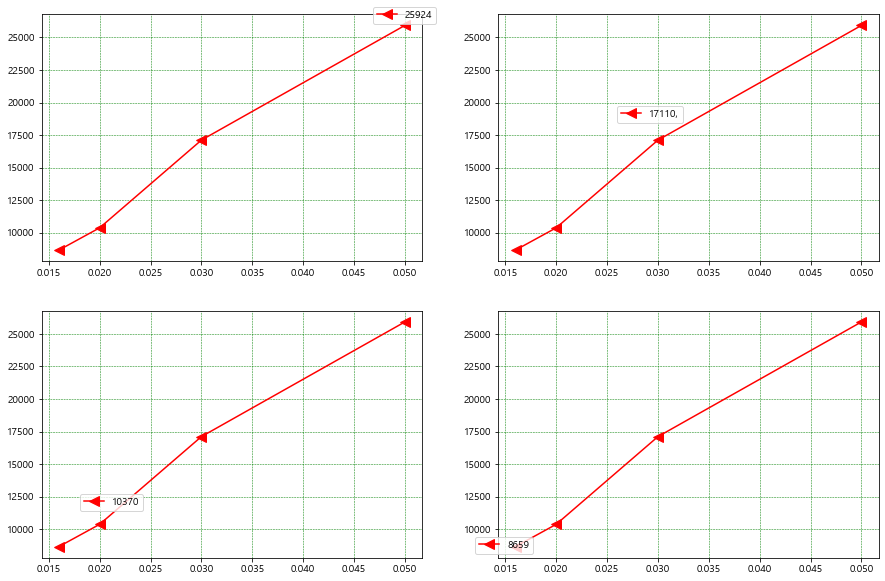

In [79]:
import numpy as np
ypoints = np.array([25924, 17110, 10370, 8659])
xpoints = np.array([0.05, 0.03, 0.02, 0.016])
x = np.arange(10)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(xpoints, ypoints,'<-r',ms=10, label='25924')
plt.legend(bbox_to_anchor=(0.8,0.8,0.25,0.25))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)# 2
plt.subplot(2,2,2)
plt.plot(xpoints, ypoints,'<-r',ms=10, label='17110,')
plt.legend(bbox_to_anchor=(0.3,0.4,0.25,0.25))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.subplot(2,2,3)
plt.plot(xpoints, ypoints,'<-r',ms=10, label='10370')
plt.legend(bbox_to_anchor=(0.03,0.03,0.25,0.25))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.subplot(2,2,4)
plt.plot(xpoints, ypoints,'<-r',ms=10, label='8659')
plt.legend(bbox_to_anchor=(0.005,0.005,0.1,0.1))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()